In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [289]:
data = pd.read_csv('starbucks-menu-nutrition-drinks.csv', index_col=0)
data.head(5)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
Ombré Pink Drink,-,-,-,-,-,-
Pink Drink,-,-,-,-,-,-
Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60,0,14,1,0,10


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Cool Lime Starbucks Refreshers™ Beverage to Orange Cream Soda
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Calories   177 non-null    object
 1   Fat (g)    177 non-null    object
 2   Carb. (g)  177 non-null    object
 3   Fiber (g)  177 non-null    object
 4   Protein    177 non-null    object
 5   Sodium     177 non-null    object
dtypes: object(6)
memory usage: 9.7+ KB


## Data pre-processing

In [291]:
# convert '-' to NaN, and all columns to numerics
for col in data.columns:
    data[col] = data[col].str.replace('-', '')
    vals = pd.to_numeric(data[col], errors='coerce')
    data[col] = vals 

In [292]:
data.isnull().sum()

Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

In [293]:
# remove NaN values
data.dropna(inplace=True)

In [294]:
data.head()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60.0,0.0,14.0,1.0,0.0,10.0
Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [296]:
data = data.reset_index()
data.head()

,index,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
data.columns

Index(['index', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [299]:
data.columns = ['Name', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium']

In [300]:
data.loc[data.Name.duplicated()]

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
28,Iced Coffee,5.0,0.0,0.0,0.0,0.0,5.0


In [301]:
data.loc[data.Name=='Iced Coffee']

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0
28,Iced Coffee,5.0,0.0,0.0,0.0,0.0,5.0


In [302]:
data.drop(index=4, inplace=True)

In [303]:
data.shape

(59, 7)

## EDA

In [309]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,59.0,152.881356,105.148513,5.0,70.0,140.0,240.0,430.0
Fat (g),59.0,3.254237,4.439607,0.0,0.0,2.0,6.0,26.0
Carb. (g),59.0,25.661017,16.251907,0.0,14.0,24.0,35.5,64.0
Fiber (g),59.0,0.694915,1.724611,0.0,0.0,0.0,0.0,8.0
Protein,59.0,5.711864,6.245138,0.0,0.0,3.0,11.0,20.0
Sodium,59.0,76.186441,74.789008,0.0,10.0,40.0,150.0,240.0


array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Fat (g)'}>],
       [<AxesSubplot:title={'center':'Carb. (g)'}>,
        <AxesSubplot:title={'center':'Fiber (g)'}>],
       [<AxesSubplot:title={'center':'Protein'}>,
        <AxesSubplot:title={'center':'Sodium'}>]], dtype=object)

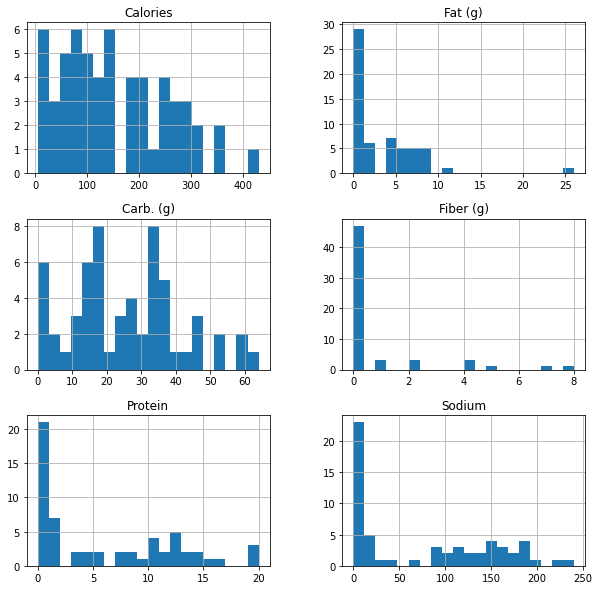

In [304]:
data.hist(figsize=(10,10), bins=20)

In [305]:
data.columns.drop(['Name'])

Index(['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium'], dtype='object')

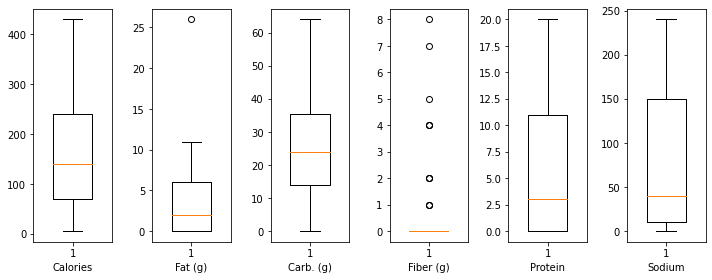

In [306]:
fig, ax = plt.subplots(1,6, figsize=(10,4))
for i, col in enumerate(data.columns.drop(['Name'])):
    ax[i].boxplot(data[col], widths=0.5)
    ax[i].set_xlabel(col)
plt.tight_layout()

<AxesSubplot:>

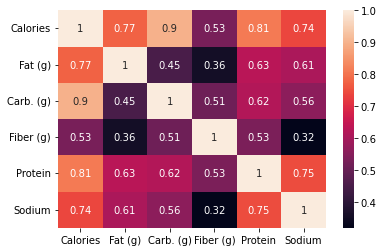

In [307]:
sns.heatmap(data.corr(), annot=True)

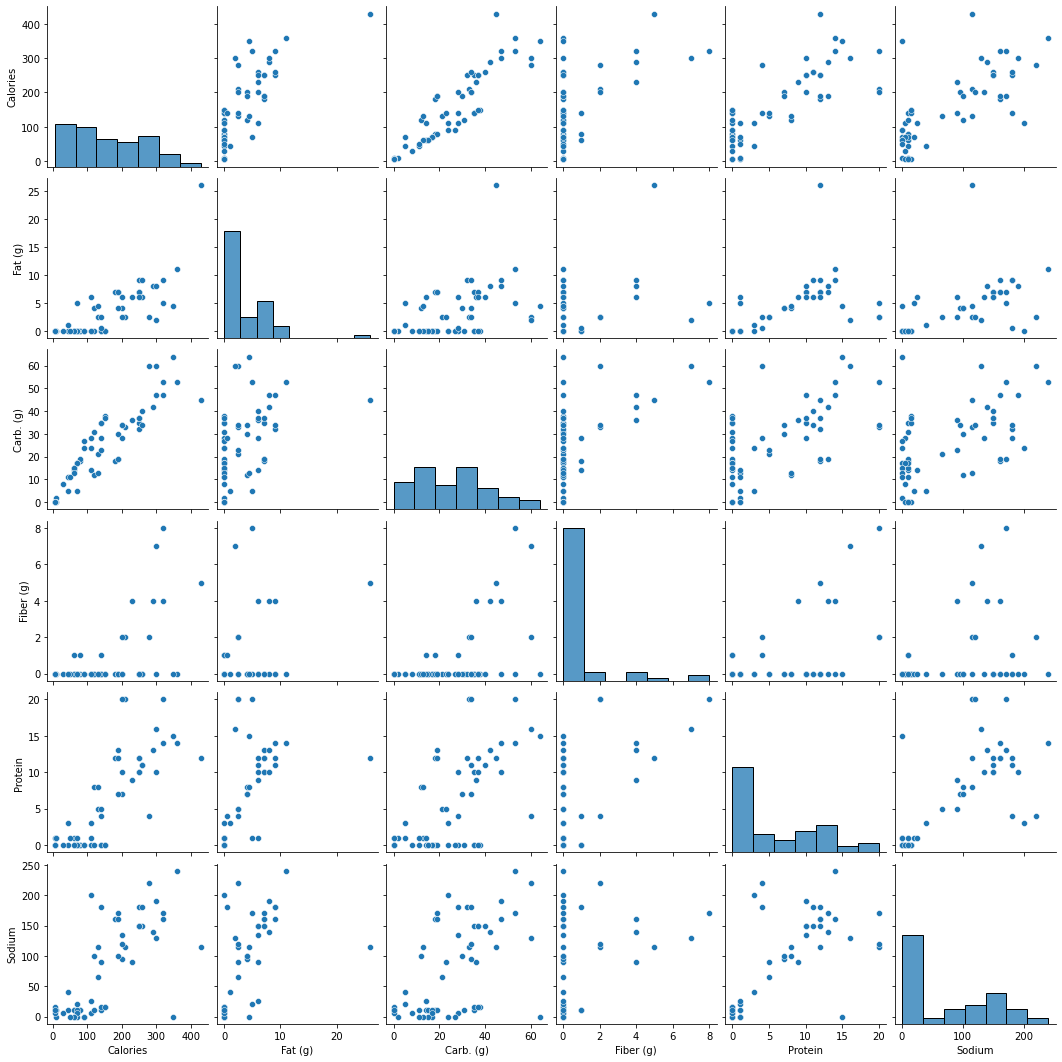

In [308]:
sns.pairplot(data)

## Modeling

In [310]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [311]:
model = LinearRegression()
X = data.drop(['Calories', 'Name'], axis=1)
y = data['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [312]:
scaler = StandardScaler()
scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
model.fit(X_train, y_train)
print('R2 score for training set:', r2_score(y_train, model.predict(X_train)))
print('R2 score for test set:', r2_score(y_test, model.predict(X_test)))

R2 score for training set: 0.9962742958862376
R2 score for test set: 0.9971251986125805


In [313]:
coef = pd.DataFrame(model.coef_)
coef.index = X.columns
coef.columns = ['coefficient']
coef

,coefficient
Fat (g),8.681251
Carb. (g),3.955550
Fiber (g),-1.764988
Protein,2.841426
Sodium,0.075011


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

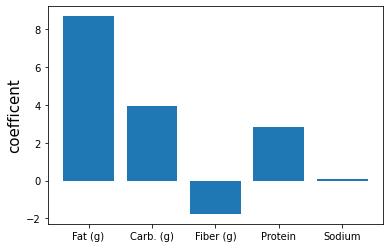

In [314]:
plt.bar(X.columns, model.coef_)
plt.ylabel('coefficent', fontsize=15)
plt.xticks()

In [315]:
categories=['Frappuccino', 'Smoothie', 'Tea/Tazo', 'Chocolate/Mocha', 'Latte/Macchiato', 'Coffee', 'Beverage', 'Cold Brew']

In [316]:
result=[]
for name in data.Name :
    flag = False
    for cat in categories:
        i = 0
        for i in range(0, len(cat.split('/'))):
            if cat.split('/')[i] in name :
                result.append(cat)
                flag = True
                break
        if flag==True:
            break
    if flag== False:
        result.append('Others')
    
print(len(result))


59


In [319]:
data['Category'] = result
data.head()

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Category
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0,Beverage
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0,Beverage
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0,Beverage
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0,Others
5,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0,Latte/Macchiato


In [320]:
data.loc[data['Category']=='Others']

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Category
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0,Others
20,Starbucks Refreshers™ Raspberry Pomegranate,90.0,0.0,27.0,0.0,0.0,0.0,Others
22,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0,Others
26,Blonde Roast,5.0,0.0,0.0,0.0,1.0,10.0,Others
37,Cappuccino,120.0,4.0,12.0,0.0,8.0,100.0,Others
41,Flat White,180.0,7.0,18.0,0.0,12.0,160.0,Others
57,Cinnamon Dolce Crème,200.0,6.0,28.0,0.0,10.0,135.0,Others


In [321]:
# sort the dataframe by Calories from high to low
data_group = data.groupby('Category').mean()
data_group['Count'] = data.groupby('Category').count()['Name']
data_group = data_group.sort_values('Calories', ascending=False)
data_group

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Count
Category,,,,,,,
Smoothie,310.000000,3.500000,56.500000,7.500000,18.000000,150.000000,2
Chocolate/Mocha,279.000000,9.100000,39.200000,1.900000,12.000000,150.000000,10
Frappuccino,220.000000,1.875000,44.000000,0.750000,6.500000,150.000000,4
Latte/Macchiato,204.000000,5.500000,28.500000,0.000000,9.500000,130.500000,10
Others,129.285714,2.785714,21.000000,0.285714,7.285714,75.714286,7
Tea/Tazo,94.615385,0.000000,23.692308,0.000000,0.000000,8.076923,13
Beverage,57.500000,0.250000,12.000000,0.500000,0.750000,17.500000,4
Cold Brew,47.500000,2.750000,4.750000,0.000000,0.500000,17.500000,4
Coffee,27.000000,0.000000,5.200000,0.000000,0.800000,3.000000,5


In [322]:
categories=data_group.index

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beverage'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Latte/Macchiato'),
  Text(3, 0, 'Chocolate/Mocha'),
  Text(4, 0, 'Tea/Tazo'),
  Text(5, 0, 'Coffee'),
  Text(6, 0, 'Cold Brew'),
  Text(7, 0, 'Frappuccino'),
  Text(8, 0, 'Smoothie')])

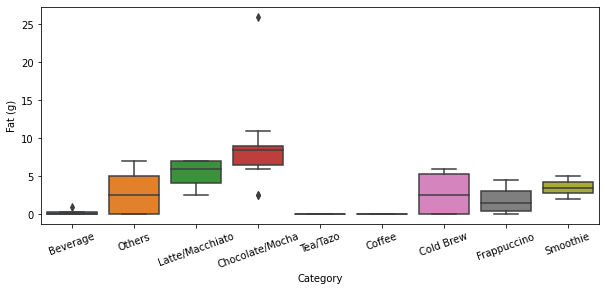

In [327]:
plt.subplots(figsize=(10,4))
sns.boxplot(data=data, x='Category', y='Fat (g)')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beverage'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Latte/Macchiato'),
  Text(3, 0, 'Chocolate/Mocha'),
  Text(4, 0, 'Tea/Tazo'),
  Text(5, 0, 'Coffee'),
  Text(6, 0, 'Cold Brew'),
  Text(7, 0, 'Frappuccino'),
  Text(8, 0, 'Smoothie')])

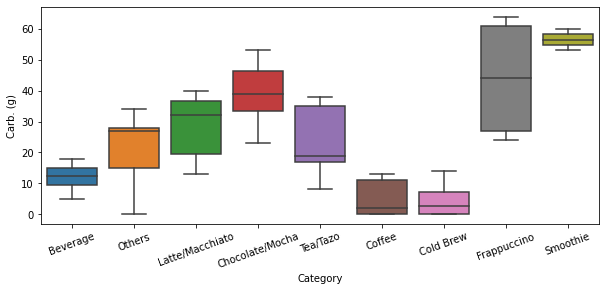

In [328]:
plt.subplots(figsize=(10,4))
sns.boxplot(data=data, x='Category', y='Carb. (g)')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beverage'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Latte/Macchiato'),
  Text(3, 0, 'Chocolate/Mocha'),
  Text(4, 0, 'Tea/Tazo'),
  Text(5, 0, 'Coffee'),
  Text(6, 0, 'Cold Brew'),
  Text(7, 0, 'Frappuccino'),
  Text(8, 0, 'Smoothie')])

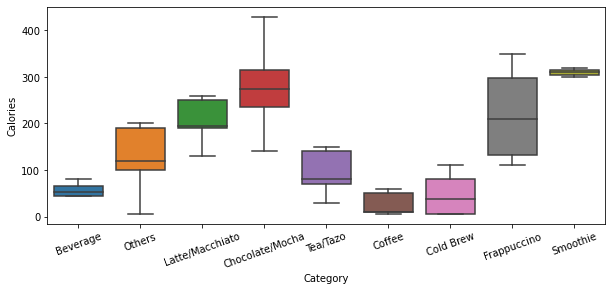

In [329]:
plt.subplots(figsize=(10,4))
sns.boxplot(data=data, x='Category', y='Calories')
plt.xticks(rotation=20)

In [176]:
data_group = data.groupby('Category').mean()
data_group['Count'] = data.groupby('Category').count()['Name']
data_group = data_group.sort_values('Calories', ascending=False)
data_group

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Count
Category,,,,,,,
Smoothie,310.000000,3.500000,56.500000,7.500000,18.000000,150.000000,2
Chocolate/Mocha,279.000000,9.100000,39.200000,1.900000,12.000000,150.000000,10
Frappuccino,220.000000,1.875000,44.000000,0.750000,6.500000,150.000000,4
Latte/Macchiato,204.000000,5.500000,28.500000,0.000000,9.500000,130.500000,10
Others,129.285714,2.785714,21.000000,0.285714,7.285714,75.714286,7
Tea/Tazo,94.615385,0.000000,23.692308,0.000000,0.000000,8.076923,13
Beverage,57.500000,0.250000,12.000000,0.500000,0.750000,17.500000,4
Cold Brew,47.500000,2.750000,4.750000,0.000000,0.500000,17.500000,4
Coffee,27.000000,0.000000,5.200000,0.000000,0.800000,3.000000,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Smoothie'),
  Text(0, 1, 'Chocolate/Mocha'),
  Text(0, 2, 'Frappuccino'),
  Text(0, 3, 'Latte/Macchiato'),
  Text(0, 4, 'Others'),
  Text(0, 5, 'Tea/Tazo'),
  Text(0, 6, 'Beverage'),
  Text(0, 7, 'Cold Brew'),
  Text(0, 8, 'Coffee')])

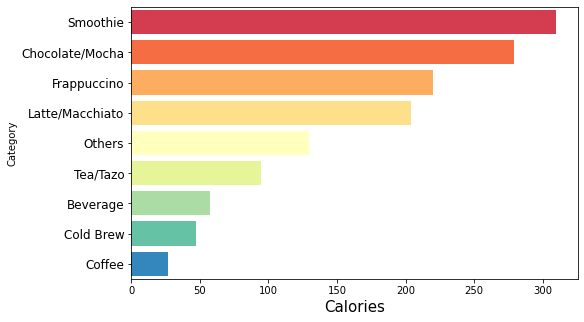

In [288]:
plt.subplots(figsize=(8,5))
sns.barplot(data=data_group, 
            x='Calories', 
            y=data_group.index,
            orient='h', palette='Spectral', saturation=1)
plt.xlabel('Calories', fontsize=15)
plt.yticks(fontsize=12)

Text(0, 0.5, '')

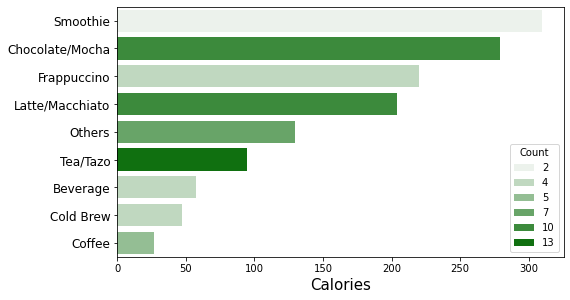

In [330]:
plt.subplots(figsize=(8,4.6))
sns.barplot(data=data_group, 
            x='Calories', 
            y=data_group.index,
            orient='h', color='g', hue='Count',dodge=False)
plt.xlabel('Calories', fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel("")

In [331]:
top4 = data_group.head(4)
top4

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Count
Category,,,,,,,
Smoothie,310.0,3.500,56.5,7.50,18.0,150.0,2
Chocolate/Mocha,279.0,9.100,39.2,1.90,12.0,150.0,10
Frappuccino,220.0,1.875,44.0,0.75,6.5,150.0,4
Latte/Macchiato,204.0,5.500,28.5,0.00,9.5,130.5,10


In [332]:
index = top4.index
column0 = top4['Fat (g)']
column1 = top4['Carb. (g)']
label0 = 'Fat (g)'
label1 = 'Carb. (g)'
column2 = top4['Protein']
label2 = 'Protein'


C:\Users\hyuan\AppData\Local\Temp\ipykernel_6888\1236170603.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(labels=top4.index, size=12)


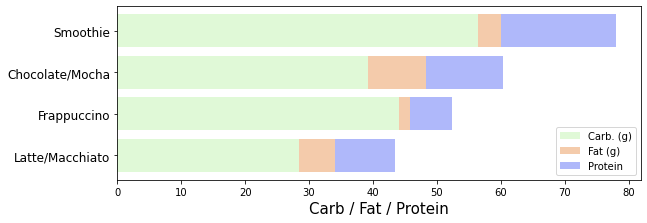

In [333]:
fig, axes = plt.subplots(figsize=(8,3), ncols=1, sharey=True)
fig.tight_layout()
axes.barh(index, column1, align='center', color='#e0f9d7', label=title1)
axes.barh(index, column0, align='center', color='#f4cbab', left=column1,label=title0)
axes.barh(index, column2, align='center', color='#AFb8fa', left=column1+column0, label=title2)
axes.set_xlabel('Carb / Fat / Protein', fontsize=15)
axes.set_yticklabels(labels=top4.index, size=12)
axes.legend()
# To show data from highest to lowest
plt.gca().invert_yaxis()


In [334]:
column0 = top4['Protein']
column1 = top4['Fiber (g)']
title0 = 'Protein'
title1 = 'Fiber (g)'

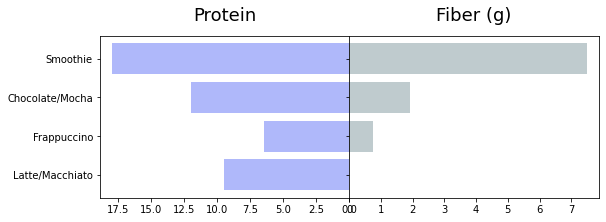

In [335]:
fig, axes = plt.subplots(figsize=(9,3), ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color='#AFb8fa')
axes[0].set_title(title0, fontsize=18, pad=15, color='k')
axes[1].barh(index, column1, align='center', color='#bfcbce')
axes[1].set_title(title1, fontsize=18, pad=15, color='k')

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

## Compare with McDonald Drinks

In [273]:
mcd = pd.read_csv('McDonald_menu.csv')
mcd.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [276]:
mcd = mcd.loc[mcd.Category=='Coffee & Tea']
mcd.drop(['Category'], inplace=True, axis=1)
mcd = mcd.loc[mcd['Serving Size']=='12 fl oz cup']
mcd.head()

,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
140,Iced Tea (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
144,Sweet Tea (Child),12 fl oz cup,110,0,0.0,0,0.0,0,0.0,0,...,27,9,0,0,27,0,0,0,0,0
145,Coffee (Small),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
148,Latte (Small),12 fl oz cup,170,80,9.0,13,5.0,24,0.0,25,...,15,5,1,3,12,9,8,0,30,0
151,Caramel Latte (Small),12 fl oz cup,270,80,9.0,13,5.0,24,0.0,25,...,40,13,1,3,38,9,8,0,30,0


In [339]:
data.loc[data.Name.str.contains('Latte')==True]

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Category
5,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0,Latte/Macchiato
35,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0,Latte/Macchiato
39,Cinnamon Dolce Latte,260.0,6.0,40.0,0.0,11.0,150.0,Latte/Macchiato
42,Iced Caffè Latte,130.0,4.5,13.0,0.0,8.0,115.0,Latte/Macchiato
45,Iced Cinnamon Dolce Latte,200.0,4.0,34.0,0.0,7.0,95.0,Latte/Macchiato
47,Iced Vanilla Latte,190.0,4.0,30.0,0.0,7.0,100.0,Latte/Macchiato
49,Latte Macchiato,190.0,7.0,19.0,0.0,12.0,160.0,Latte/Macchiato
51,Vanilla Latte,250.0,6.0,37.0,0.0,12.0,150.0,Latte/Macchiato


In [341]:
data_group

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Count
Category,,,,,,,
Smoothie,310.000000,3.500000,56.500000,7.500000,18.000000,150.000000,2
Chocolate/Mocha,279.000000,9.100000,39.200000,1.900000,12.000000,150.000000,10
Frappuccino,220.000000,1.875000,44.000000,0.750000,6.500000,150.000000,4
Latte/Macchiato,204.000000,5.500000,28.500000,0.000000,9.500000,130.500000,10
Others,129.285714,2.785714,21.000000,0.285714,7.285714,75.714286,7
Tea/Tazo,94.615385,0.000000,23.692308,0.000000,0.000000,8.076923,13
Beverage,57.500000,0.250000,12.000000,0.500000,0.750000,17.500000,4
Cold Brew,47.500000,2.750000,4.750000,0.000000,0.500000,17.500000,4
Coffee,27.000000,0.000000,5.200000,0.000000,0.800000,3.000000,5


In [347]:
data.loc[data.Name.str.contains('Latte')==True]

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Category
5,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0,Latte/Macchiato
35,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0,Latte/Macchiato
39,Cinnamon Dolce Latte,260.0,6.0,40.0,0.0,11.0,150.0,Latte/Macchiato
42,Iced Caffè Latte,130.0,4.5,13.0,0.0,8.0,115.0,Latte/Macchiato
45,Iced Cinnamon Dolce Latte,200.0,4.0,34.0,0.0,7.0,95.0,Latte/Macchiato
47,Iced Vanilla Latte,190.0,4.0,30.0,0.0,7.0,100.0,Latte/Macchiato
49,Latte Macchiato,190.0,7.0,19.0,0.0,12.0,160.0,Latte/Macchiato
51,Vanilla Latte,250.0,6.0,37.0,0.0,12.0,150.0,Latte/Macchiato


In [344]:
print('Average calories of Starbucks Latte:', data.loc[data.Name.str.contains('Latte')==True].Calories.mean())
print('Average calories of Starbucks Tea:', data.loc[data.Name.str.contains('Tea')==True].Calories.mean())
print('Average calories of Tazo:', data.loc[data.Name.str.contains('Tazo')==True].Calories.mean())

Average calories of Starbucks Latte: 192.5
Average calories of Starbucks Tea: 66.66666666666667
Average calories of Tazo: 118.57142857142857


#### Starbucks drinks vs. McDonald drinks:
- Teas and regular cafe latte from Starbucks and McDonald have similar calories
- Flavored latte from Starbucks have less calories than McDonald’s 
